# IMAGE INPAINTING
Pierre Marrec and Paul Krieger, CGDI, ENS de Lyon, 29.03.2021

In this notebook we implement an image inpainting algorithm which relys on CNNs.

In [3]:
#imports
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from os import listdir
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

First we get the data set. In this implementation we consider images with the shape 32*32

In [4]:
#path to our images
path_training_org= 'C:/Users/pnk72/Downloads/CDGI-project/TrainingData3232/Original'
#list all available images
photos=os.listdir(path_training_org)

In [7]:
#this method combines the path with the photo names and returns a data set with all corresponding photos
def getImages(path):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = cv2.imread(path_training_org+'\\'+ image)
        loadedImages.append(img)
    return np.array(loadedImages)

In [9]:
#get the photos
data = getImages(path_training_org)
#lets have a look at the shape etc of the data set
data.shape

(3590, 32, 32, 3)

In order to train our model later, we have to create a traing data set and a test data set. We decided to split the data set in the proportion 0.8/0.2.

In [10]:
#at the moment we do not have labels. Therefore x=y=data
x_train,x_test,y_train,y_test = train_test_split(data,data,test_size=0.2)

In [16]:
#lets have a look at the shapes of our training an testing data:
print('x_train shape:', x_train.shape)
print('x_test shape:',x_test.shape)

x_train shape: (2872, 32, 32, 3)
x_test shape: (718, 32, 32, 3)


It might also be interesting how our data looks like:

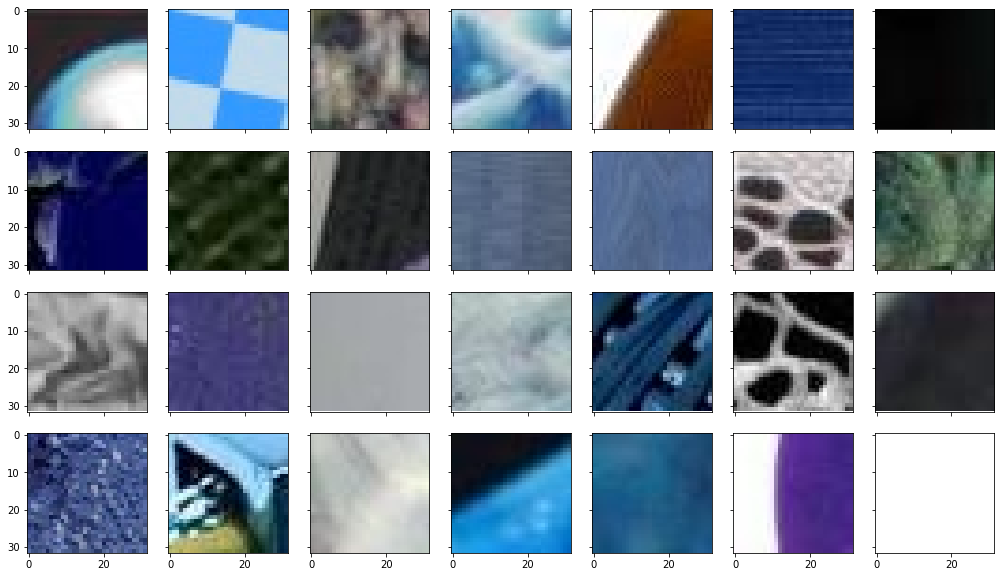

In [17]:
fig = plt.figure(figsize=(20, 10.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(4, 7),  
                 axes_pad=0.3,
                 )
for ax, image in zip(grid,x_train[:28]):
    ax.imshow(image)
plt.show()